In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-85.15931218067121, -153.84003268426537),
 (-32.14463012198948, 24.883508606402415),
 (29.472339005780697, 130.25444996156796),
 (86.27924461604792, -159.94998733362647),
 (-32.95783609496908, -79.00781299914517),
 (-55.544754366289524, -55.1191591768833),
 (61.853257634470395, -52.26550631584533),
 (-64.87753889104943, 67.08034124957513),
 (-83.61891804064373, -22.48281917621614),
 (-15.516704128318622, -105.87965331991695),
 (56.639548456440224, -167.62030760161568),
 (-54.49172502934099, 39.8300965828507),
 (-33.54222993894854, -38.75506713557863),
 (-34.516010267907944, 146.30086761840295),
 (-35.71769428267679, 50.18787128554601),
 (-84.23345859444753, 76.59438546098397),
 (-63.83874165216755, 145.41877609349672),
 (-26.24448235009671, -123.99336046425547),
 (71.23777526584331, -8.902552192585375),
 (69.50236505389526, 31.16835954503904),
 (37.467373273929454, -35.29805519254688),
 (-29.88177241137953, -101.82981930624008),
 (-54.82752199817777, -68.27353118626),
 (46.9205736474

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | graaff-reinet
Processing Record 3 of Set 1 | naze
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | talcahuano
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | nuuk
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | leeton
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | hobart
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | vestmanna
Processing Record 18 of Set 1 | pechenga
Processing Record 19 of Set 1 | ribeira grande
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | sosnovskoye
Process

Processing Record 38 of Set 4 | miles city
Processing Record 39 of Set 4 | auki
Processing Record 40 of Set 4 | sabang
Processing Record 41 of Set 4 | jinchang
Processing Record 42 of Set 4 | bluff
Processing Record 43 of Set 4 | longyearbyen
Processing Record 44 of Set 4 | hasaki
Processing Record 45 of Set 4 | sibsagar
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | butembo
Processing Record 48 of Set 4 | port macquarie
Processing Record 49 of Set 4 | chiang khong
Processing Record 50 of Set 4 | yulara
Processing Record 1 of Set 5 | macaboboni
City not found. Skipping...
Processing Record 2 of Set 5 | samara
Processing Record 3 of Set 5 | salekhard
Processing Record 4 of Set 5 | suao
City not found. Skipping...
Processing Record 5 of Set 5 | saint-philippe
Processing Record 6 of Set 5 | mandalgovi
Processing Record 7 of Set 5 | touros
Processing Record 8 of Set 5 | letlhakane
Processing Record 9 of Set 5 | xiangfan
Processing Record 10 of Set 5 | verkhnyaya i

Processing Record 26 of Set 8 | faanui
Processing Record 27 of Set 8 | sterling
Processing Record 28 of Set 8 | pontes e lacerda
Processing Record 29 of Set 8 | paradwip
City not found. Skipping...
Processing Record 30 of Set 8 | sorland
Processing Record 31 of Set 8 | chunoyar
Processing Record 32 of Set 8 | innisfail
Processing Record 33 of Set 8 | broome
Processing Record 34 of Set 8 | westport
Processing Record 35 of Set 8 | gamboma
Processing Record 36 of Set 8 | bitung
Processing Record 37 of Set 8 | hami
Processing Record 38 of Set 8 | khorixas
Processing Record 39 of Set 8 | mutsu
Processing Record 40 of Set 8 | japura
Processing Record 41 of Set 8 | tommot
Processing Record 42 of Set 8 | tautira
Processing Record 43 of Set 8 | athabasca
Processing Record 44 of Set 8 | ancud
Processing Record 45 of Set 8 | rocha
Processing Record 46 of Set 8 | kodiak
Processing Record 47 of Set 8 | izhma
Processing Record 48 of Set 8 | port augusta
Processing Record 49 of Set 8 | mount pleasant

Processing Record 14 of Set 12 | sebring
Processing Record 15 of Set 12 | conakry
Processing Record 16 of Set 12 | suicheng
Processing Record 17 of Set 12 | navrongo
Processing Record 18 of Set 12 | guozhen
Processing Record 19 of Set 12 | glenwood springs
Processing Record 20 of Set 12 | san ignacio
Processing Record 21 of Set 12 | kijang
Processing Record 22 of Set 12 | fortuna
Processing Record 23 of Set 12 | bereda
Processing Record 24 of Set 12 | komsomolskiy
Processing Record 25 of Set 12 | coahuayana
Processing Record 26 of Set 12 | aldama
Processing Record 27 of Set 12 | kracheh
City not found. Skipping...
Processing Record 28 of Set 12 | chernyshevsk
Processing Record 29 of Set 12 | camopi
Processing Record 30 of Set 12 | kegayli
City not found. Skipping...
Processing Record 31 of Set 12 | ixtapa
Processing Record 32 of Set 12 | champasak
Processing Record 33 of Set 12 | zhangye
Processing Record 34 of Set 12 | nerchinsk
Processing Record 35 of Set 12 | samusu
City not found. 

In [11]:
len(city_data)

558

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,48.47,99,100,1.88,NZ,2022-08-20 16:17:17
1,Graaff-Reinet,-32.2522,24.5308,49.93,50,93,17.60,ZA,2022-08-20 16:17:18
2,Naze,28.3667,129.4833,81.52,86,100,14.79,JP,2022-08-20 16:17:18
3,Barrow,71.2906,-156.7887,30.22,93,100,12.66,US,2022-08-20 16:17:19
4,Talcahuano,-36.7167,-73.1167,55.08,76,0,11.50,CL,2022-08-20 16:17:19
5,Ushuaia,-54.8000,-68.3000,40.66,48,0,5.75,AR,2022-08-20 16:17:19
6,Nuuk,64.1835,-51.7216,41.61,87,100,9.22,GL,2022-08-20 16:15:19
7,Puerto Ayora,-0.7393,-90.3518,76.96,94,98,7.00,EC,2022-08-20 16:17:20
8,Bethel,41.3712,-73.4140,91.15,51,20,6.91,US,2022-08-20 16:17:20
9,East London,-33.0153,27.9116,52.74,76,0,20.71,ZA,2022-08-20 16:17:21


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-08-20 16:17:17,-46.1927,168.8643,48.47,99,100,1.88
1,Graaff-Reinet,ZA,2022-08-20 16:17:18,-32.2522,24.5308,49.93,50,93,17.60
2,Naze,JP,2022-08-20 16:17:18,28.3667,129.4833,81.52,86,100,14.79
3,Barrow,US,2022-08-20 16:17:19,71.2906,-156.7887,30.22,93,100,12.66
4,Talcahuano,CL,2022-08-20 16:17:19,-36.7167,-73.1167,55.08,76,0,11.50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1661013312.641402

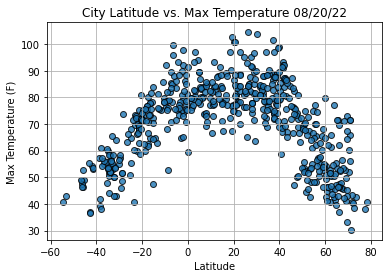

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

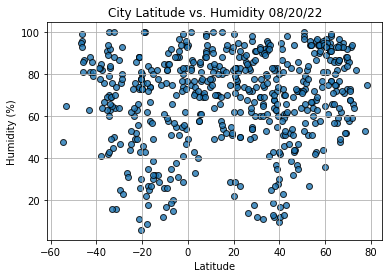

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

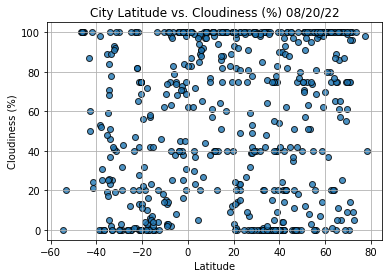

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

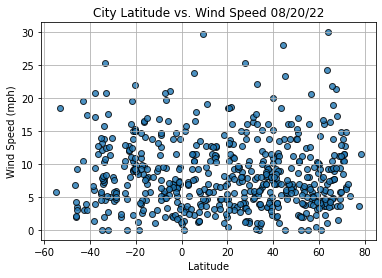

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                       Hobart
Country                        AU
Date          2022-08-20 16:17:06
Lat                      -42.8794
Lng                      147.3294
Max Temp                    37.06
Humidity                       88
Cloudiness                     50
Wind Speed                  10.36
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

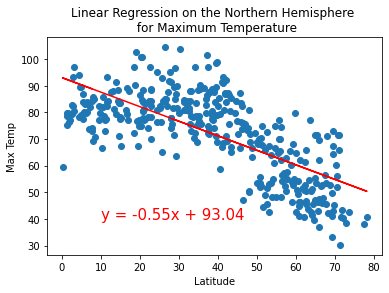

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

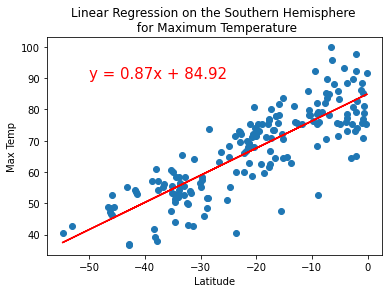

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

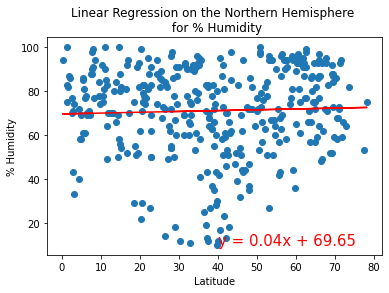

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

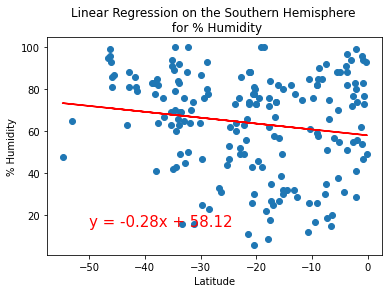

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

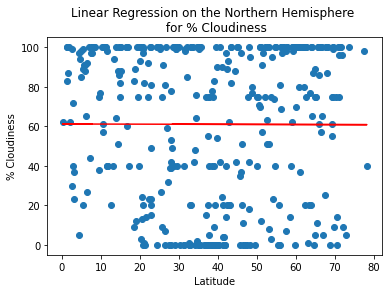

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,15))

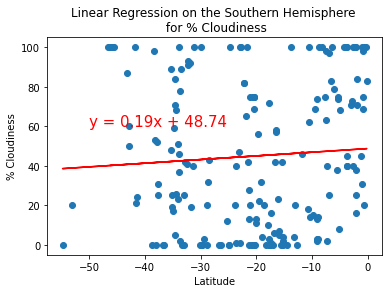

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

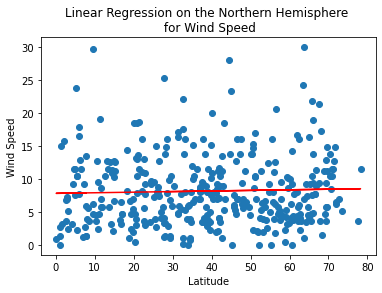

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

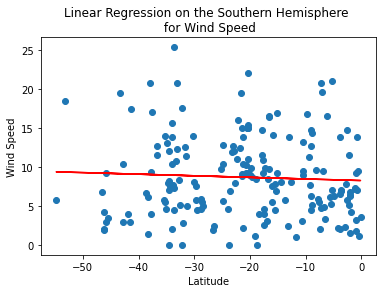

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))